In [1]:
import pandas as pd
X_train_b = pd.read_csv('/data/cs5014/P2/binary/X_train.csv', header=None)
#X_train_b

In [2]:
Y_train_b = pd.read_csv('/data/cs5014/P2/binary/Y_train.csv', header=None)
Y_train_b

,0
0,background
1,background
2,background
3,background
4,background
...,...
62205,seal
62206,seal
62207,seal
62208,seal


In [3]:
X_test_b = pd.read_csv('/data/cs5014/P2/binary/X_test.csv', header=None)
#X_test_b

In [4]:
#Y_train_b[0].value_counts()

In [5]:
from sklearn.model_selection import train_test_split
X_train_train, X_train_test, Y_train_train, Y_train_test = train_test_split(X_train_b, Y_train_b, test_size=0.33, random_state=50)

In [6]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import time
svm_model_init = SVC()
scaler = StandardScaler()
before = time.time()
svm_model_init.fit(scaler.fit_transform(X_train_train), Y_train_train)
after = time.time()
print(after - before)

/cs/home/akhkr1/CS5014/python/lib64/python3.9/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


293.07263565063477


In [7]:
from sklearn.metrics import accuracy_score, classification_report
Y_pred_init = svm_model_init.predict(scaler.transform(X_train_test))
svm_report_init = classification_report(Y_train_test, Y_pred_init, output_dict=True)
print(svm_report_init)

{'background': {'precision': 0.9795460760185944, 'recall': 0.9966058312931226, 'f1-score': 0.9880023167939984, 'support': 17972}, 'seal': {'precision': 0.9728285077951002, 'recall': 0.8537920250195465, 'f1-score': 0.9094316052467208, 'support': 2558}, 'accuracy': 0.9788114953726255, 'macro avg': {'precision': 0.9761872919068473, 'recall': 0.9251989281563346, 'f1-score': 0.9487169610203596, 'support': 20530}, 'weighted avg': {'precision': 0.9787090794518288, 'recall': 0.9788114953726255, 'f1-score': 0.9782125515656527, 'support': 20530}}


In [8]:
Y_pred_init = pd.DataFrame(Y_pred_init, columns=['label'])
print(Y_pred_init.value_counts()['seal'])
Y_pred_init.shape

2245


(20530, 1)

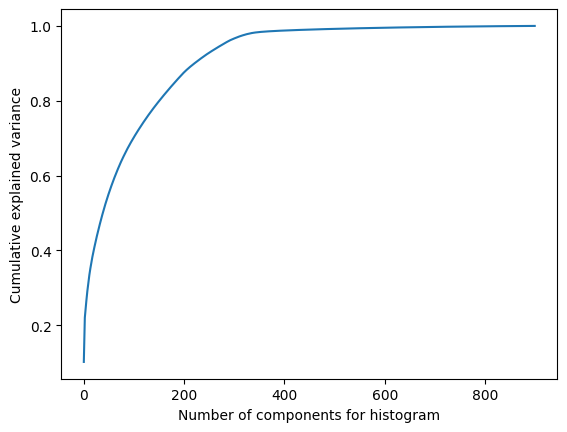

In [9]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

X_hist = X_train_train.loc[:,:899]
X_nd = X_train_train.loc[:,900:915]
X_rgb = X_train_train.loc[:,916:964]

# Fit PCA to data
pca_hist = PCA()
pca_hist.fit(X_hist)

# Plot scree plot
plt.plot(np.cumsum(pca_hist.explained_variance_ratio_))
plt.xlabel('Number of components for histogram')
plt.ylabel('Cumulative explained variance')
plt.show()

In [10]:
#X_hist

In [11]:
#X_nd

In [12]:
# Get explained variance ratios
explained_variances = pca_hist.explained_variance_ratio_

# Calculate cumulative explained variances
cumulative_variances = np.cumsum(explained_variances)

# Find number of components needed to capture specified amount of variance
threshold = 0.95
n_components_hist = np.argmax(cumulative_variances >= threshold) + 1
print(n_components_hist)

278


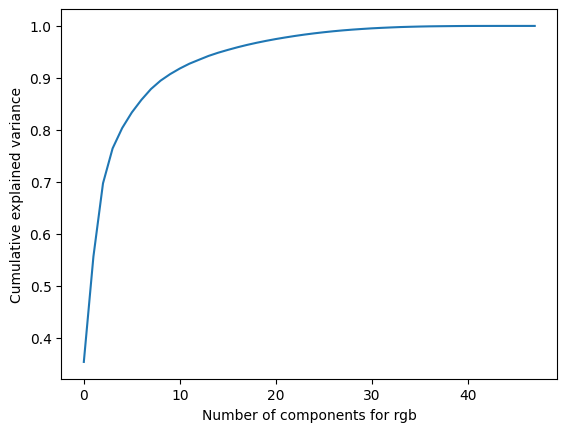

In [13]:
# Fit PCA to data
pca_rgb = PCA()
pca_rgb.fit(X_rgb)

# Plot scree plot
plt.plot(np.cumsum(pca_rgb.explained_variance_ratio_))
plt.xlabel('Number of components for rgb')
plt.ylabel('Cumulative explained variance')
plt.show()

In [14]:
# Get explained variance ratios
explained_variances = pca_rgb.explained_variance_ratio_

# Calculate cumulative explained variances
cumulative_variances = np.cumsum(explained_variances)

# Find number of components needed to capture specified amount of variance
threshold = 0.95
n_components_rgb = np.argmax(cumulative_variances >= threshold) + 1
print(n_components_rgb)

16


Now, if the first 2 PCAs have a total variance of 80%, it means that they preserve 80% information of the main dataset.
If the number is 60% it means that they preserve 60% information of the main dataset.
Hence, the lower the total variance is, the higher is the information loss.
argmax gives the starting number of components where the threshold condition is met

In [15]:
# Transform train data to reduced-dimensional space
X_hist_pca = pca_hist.transform(X_hist)[:,:n_components_hist]
X_rgb_pca = pca_rgb.transform(X_rgb)[:,:n_components_rgb]
data_reduced_X_train_b = np.concatenate((X_hist_pca, X_nd, X_rgb_pca), axis=1)
# Define column names for the DataFrame
column_names = ['PCA_hist_{}'.format(i) for i in range(n_components_hist)] + ['X_nd_{}'.format(i) for i in range(X_nd.shape[1])] + ['PCA_rgb_{}'.format(i) for i in range(n_components_rgb)]

# Create a DataFrame from the numpy array, with column names
df_reduced_X_train_b = pd.DataFrame(data_reduced_X_train_b, columns=column_names)

#df_reduced_X_train_b

In [16]:
# Transform test data to reduced-dimensional space
X_hist_test = X_train_test.loc[:,:899]
X_nd_test = X_train_test.loc[:,900:915]
X_rgb_test = X_train_test.loc[:,916:964]

# Transform data to reduced-dimensional space
X_hist_test_pca = pca_hist.transform(X_hist_test)[:,:n_components_hist]
X_rgb_test_pca = pca_rgb.transform(X_rgb_test)[:,:n_components_rgb]
data_reduced_X_test_b = np.concatenate((X_hist_test_pca, X_nd_test, X_rgb_test_pca), axis=1)
# Define column names for the DataFrame
column_names = ['PCA_hist_{}'.format(i) for i in range(n_components_hist)] + ['X_nd_{}'.format(i) for i in range(X_nd.shape[1])] + ['PCA_rgb_{}'.format(i) for i in range(n_components_rgb)]

# Create a DataFrame from the numpy array, with column names
df_reduced_X_test_b = pd.DataFrame(data_reduced_X_test_b, columns=column_names)

#df_reduced_X_test_b

In [17]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
svm = SVC()
before = time.time()
svm.fit(scaler.fit_transform(df_reduced_X_train_b), Y_train_train)
after = time.time()
print(after - before)

/cs/home/akhkr1/CS5014/python/lib64/python3.9/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


191.56088209152222


In [18]:
Y_pred_svm = svm.predict(scaler.transform(df_reduced_X_test_b))
svm_report = classification_report(Y_train_test, Y_pred_svm, output_dict=True)
print(svm_report)

{'background': {'precision': 0.9692374350086655, 'recall': 0.9957711996438905, 'f1-score': 0.9823251729059174, 'support': 17972}, 'seal': {'precision': 0.9632139399806389, 'recall': 0.777951524628616, 'f1-score': 0.860726643598616, 'support': 2558}, 'accuracy': 0.9686312713102776, 'macro avg': {'precision': 0.9662256874946522, 'recall': 0.8868613621362533, 'f1-score': 0.9215259082522667, 'support': 20530}, 'weighted avg': {'precision': 0.9684869186773604, 'recall': 0.9686312713102776, 'f1-score': 0.9671742212270046, 'support': 20530}}


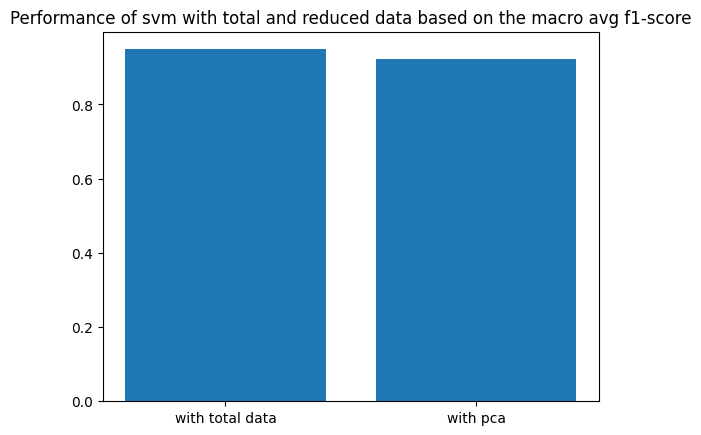

In [19]:
import matplotlib.pyplot as plt0
labels = ["with total data", "with pca"]
reduced_data = [svm_report_init["macro avg"]["f1-score"], svm_report["macro avg"]["f1-score"]]
plt0.bar(labels, reduced_data)
plt0.title("Performance of svm with total and reduced data based on the macro avg f1-score")
plt0.show()

even though the training is more, it is evident that the f1 score is high when the total data is considered

In [20]:
from sklearn.ensemble import RandomForestClassifier
rd_model = RandomForestClassifier()
rd_model.fit(X_train_train, Y_train_train)

/tmp/ipykernel_452194/4280424909.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rd_model.fit(X_train_train, Y_train_train)


RandomForestClassifier()

In [21]:
from sklearn.metrics import accuracy_score, classification_report
Y_pred = rd_model.predict(X_train_test)
rd_report = classification_report(Y_train_test, Y_pred, output_dict=True)
print(rd_report)

{'background': {'precision': 0.9654986522911051, 'recall': 0.9965501891831738, 'f1-score': 0.9807787087235091, 'support': 17972}, 'seal': {'precision': 0.9686868686868687, 'recall': 0.7498045347928068, 'f1-score': 0.8453063023358307, 'support': 2558}, 'accuracy': 0.965806137359961, 'macro avg': {'precision': 0.967092760488987, 'recall': 0.8731773619879903, 'f1-score': 0.9130425055296699, 'support': 20530}, 'weighted avg': {'precision': 0.9658958981527885, 'recall': 0.965806137359961, 'f1-score': 0.9638990976402319, 'support': 20530}}


In [22]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_train, Y_train_train)

/cs/home/akhkr1/CS5014/python/lib64/python3.9/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [23]:
Y_pred_knn = knn.predict(X_train_test)
knn_report = classification_report(Y_train_test, Y_pred_knn, output_dict=True)
print(knn_report)

{'background': {'precision': 0.9330805383465072, 'recall': 0.9721233029156465, 'f1-score': 0.9522018748637453, 'support': 17972}, 'seal': {'precision': 0.7225913621262459, 'recall': 0.5101641907740422, 'f1-score': 0.5980751604032997, 'support': 2558}, 'accuracy': 0.9145640526059425, 'macro avg': {'precision': 0.8278359502363766, 'recall': 0.7411437468448443, 'f1-score': 0.7751385176335225, 'support': 20530}, 'weighted avg': {'precision': 0.9068539765943674, 'recall': 0.9145640526059425, 'f1-score': 0.9080783417127556, 'support': 20530}}


In [24]:
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
gnb = GaussianNB()
gnb.fit(scaler.fit_transform(X_train_train), Y_train_train)

/cs/home/akhkr1/CS5014/python/lib64/python3.9/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [25]:
Y_pred_gnb = gnb.predict(scaler.transform(X_train_test))
gnb_report = classification_report(Y_train_test, Y_pred_gnb, output_dict=True)
print(gnb_report)

{'background': {'precision': 0.9808951637128267, 'recall': 0.9084687291342087, 'f1-score': 0.9432937574024324, 'support': 17972}, 'seal': {'precision': 0.5765765765765766, 'recall': 0.8756841282251759, 'f1-score': 0.695328263231414, 'support': 2558}, 'accuracy': 0.9043838285435948, 'macro avg': {'precision': 0.7787358701447016, 'recall': 0.8920764286796923, 'f1-score': 0.8193110103169232, 'support': 20530}, 'weighted avg': {'precision': 0.9305178161290699, 'recall': 0.9043838285435948, 'f1-score': 0.9123977158004126, 'support': 20530}}


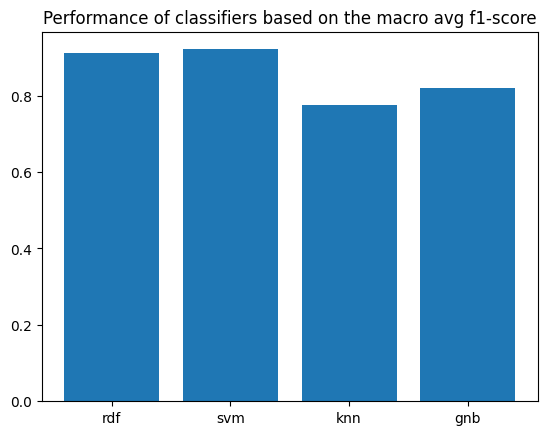

In [26]:
import matplotlib.pyplot as plt
x = ["rdf", "svm", "knn", "gnb"]
y = [rd_report["macro avg"]["f1-score"], svm_report["macro avg"]["f1-score"], knn_report["macro avg"]["f1-score"],
    gnb_report["macro avg"]["f1-score"]]
plt.bar(x, y)
plt.title("Performance of classifiers based on the macro avg f1-score")
plt.show()

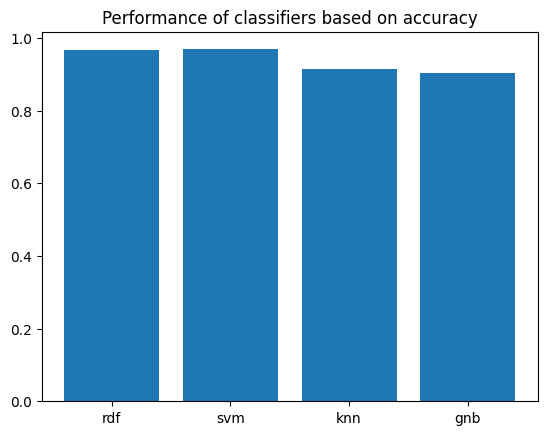

In [27]:
import matplotlib.pyplot as plt1
x1 = ["rdf", "svm", "knn", "gnb"]
y1 = [rd_report["accuracy"], svm_report["accuracy"], knn_report["accuracy"], gnb_report["accuracy"]]
plt1.bar(x1, y1)
plt1.title("Performance of classifiers based on accuracy")
plt1.show()

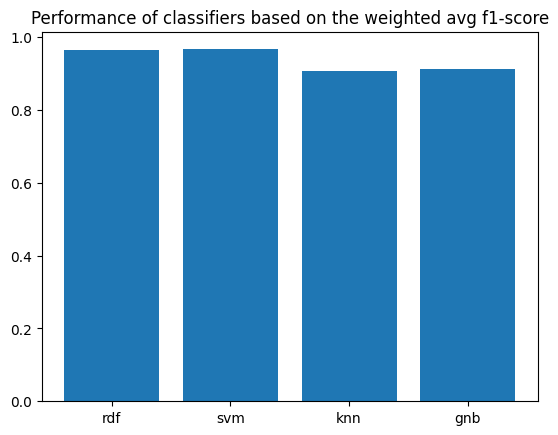

In [28]:
import matplotlib.pyplot as plt2
x2 = ["rdf", "svm", "knn", "gnb"]
y2 = [rd_report["weighted avg"]["f1-score"], svm_report["weighted avg"]["f1-score"], knn_report["weighted avg"]["f1-score"],
    gnb_report["weighted avg"]["f1-score"]]
plt2.bar(x2, y2)
plt2.title("Performance of classifiers based on the weighted avg f1-score")
plt2.show()

In [ ]:
# Final output
#svm_model_init.fit(scaler.fit_transform(X_train_b), Y_train_b)
#Y_pred_final_b = svm_model_init.predict(scaler.transform(X_test_b))
#Y_pred_final_b

/cs/home/akhkr1/CS5014/python/lib64/python3.9/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
#import pandas as pd
#Y_pred_svm_binary = pd.DataFrame(Y_pred_final_b)
#Y_pred_svm_binary

In [ ]:
#print(Y_pred_svm_binary.value_counts()['seal'])

In [ ]:
#Y_pred_svm_binary.to_csv('Y_test.csv')

In [ ]:
#Y_train_b.to_csv('train.csv')